# Basic Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import itertools
import warnings

## Data Preprocessing

### Data Collection

In [2]:
df = pd.read_csv('data/company_revenue.csv')

In [3]:
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


### Data Cleansing

#### Clean datetime

In [5]:
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')

In [6]:
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,2022-08-01,NaN,NaN,NaN,NaN
92,2022-09-01,NaN,NaN,NaN,NaN
93,2022-10-01,NaN,NaN,NaN,NaN
94,2022-11-01,NaN,NaN,NaN,NaN


#### Set datetime index

In [7]:
df.index = df['Period'].values
df = df.drop(columns=['Period'])

In [8]:
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2022-08-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN


#### Define target

In [9]:
target = 'Revenue'

#### Check data type

In [10]:
df.dtypes

Revenue                                     float64
Sales_quantity                              float64
Average_cost                                float64
The_average_annual_payroll_of_the_region    float64
dtype: object

#### Clean missing value

In [11]:
df = df.dropna(subset=[target])

In [12]:
df.isnull().sum()

Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [13]:
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2019-12-01,5.875647e+07,38069.0,1543.420464,29878525.0
2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
2020-02-01,4.022524e+07,23509.0,1711.057181,29044998.0
2020-03-01,5.002217e+07,32569.0,1535.882748,29044998.0


#### Check missing timestamp

In [14]:
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')

In [15]:
full_range

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [16]:
missing_timestamps = full_range.difference(df.index)

In [17]:
missing_timestamps

DatetimeIndex([], dtype='datetime64[ns]', freq='MS')

In [18]:
len(full_range) == len(df)

True

### Time Series analysis

#### Observation

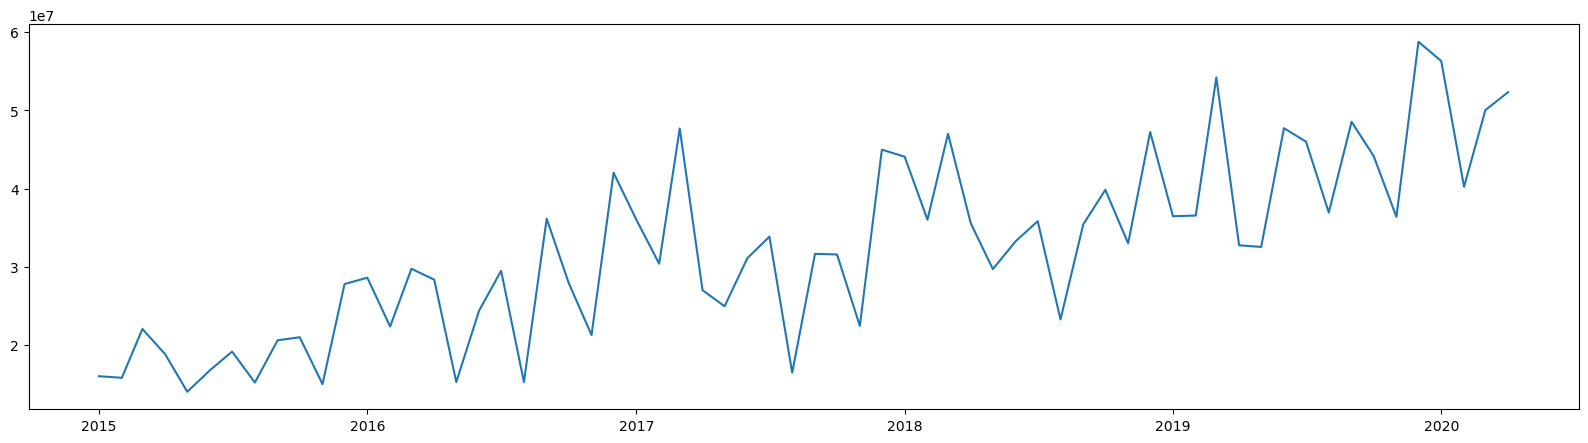

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(df[target])
plt.show()

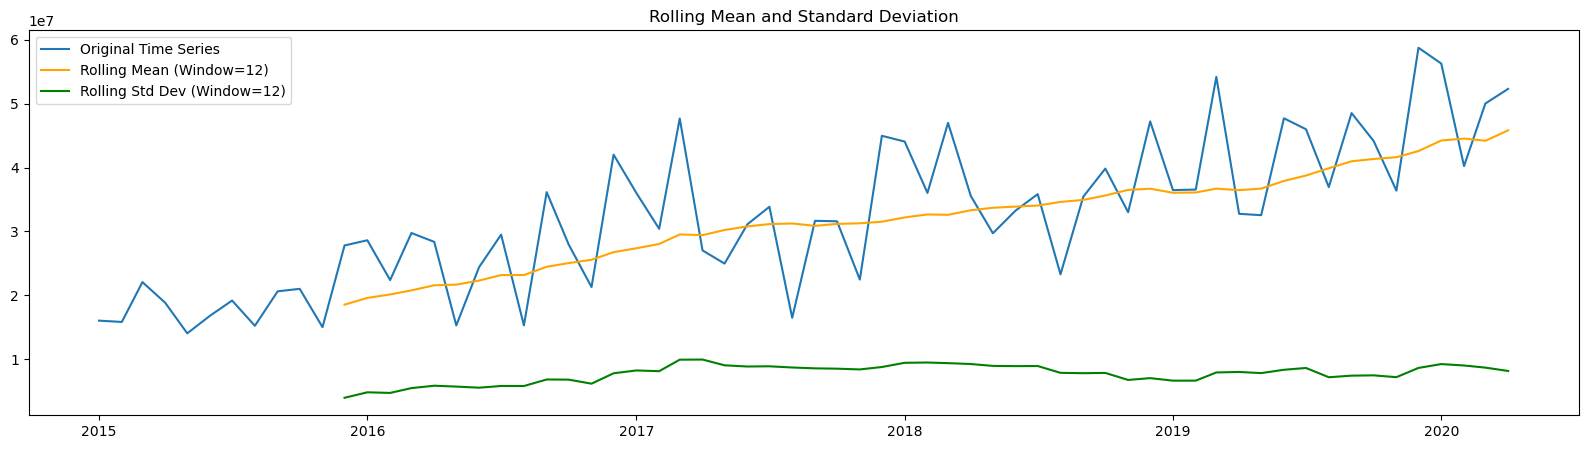

In [20]:
window_size = 12

rolling_mean = df[target].rolling(window=window_size).mean()
rolling_std = df[target].rolling(window=window_size).std()

plt.figure(figsize=(20, 5))
plt.plot(df[target], label='Original Time Series')
plt.plot(rolling_mean, label='Rolling Mean (Window=12)', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev (Window=12)', color='green')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

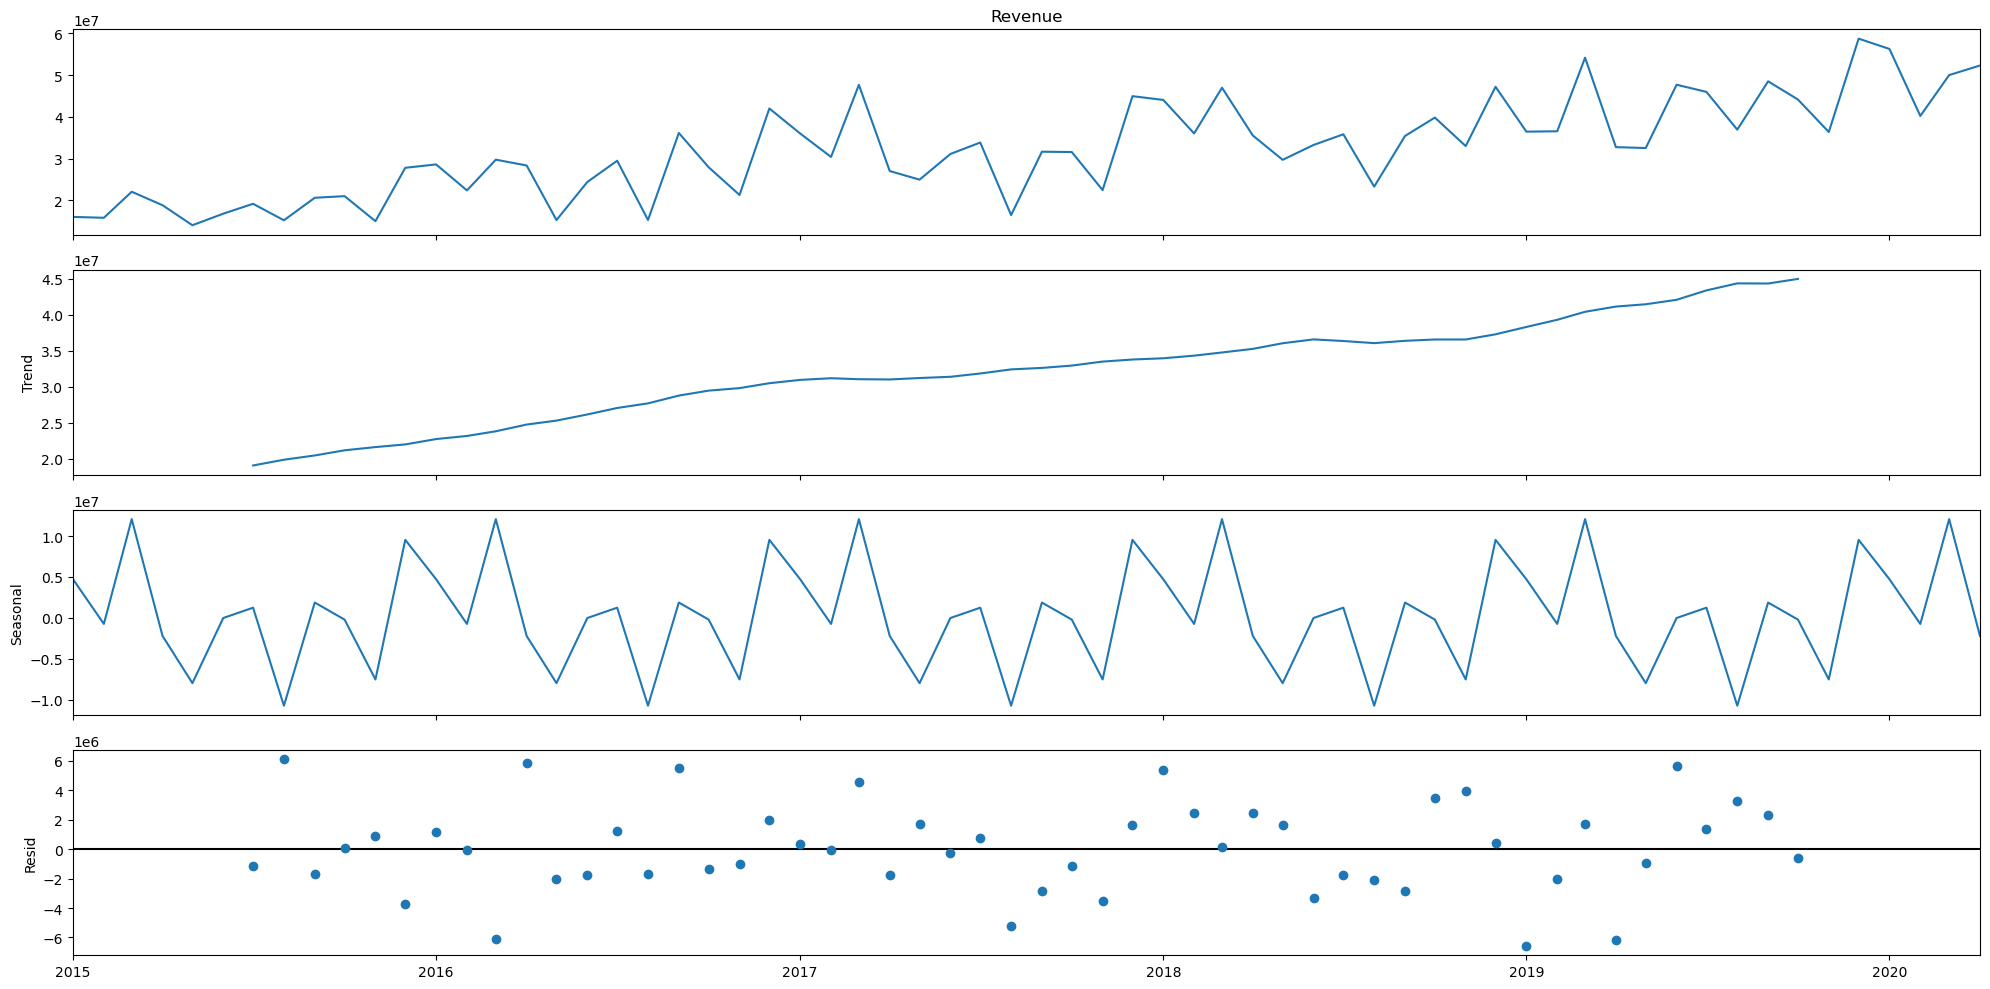

In [21]:
decomposition = seasonal_decompose(df[target], model='additive', period=12)

plt.rcParams.update({'figure.figsize': (20, 10)})
decomposition.plot()
plt.show()

In [22]:
adf_test_result = adfuller(df[target])

In [23]:
adf_test_result

(-0.2691489356436286,
 0.9297615379617789,
 11,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 1774.2279588451102)

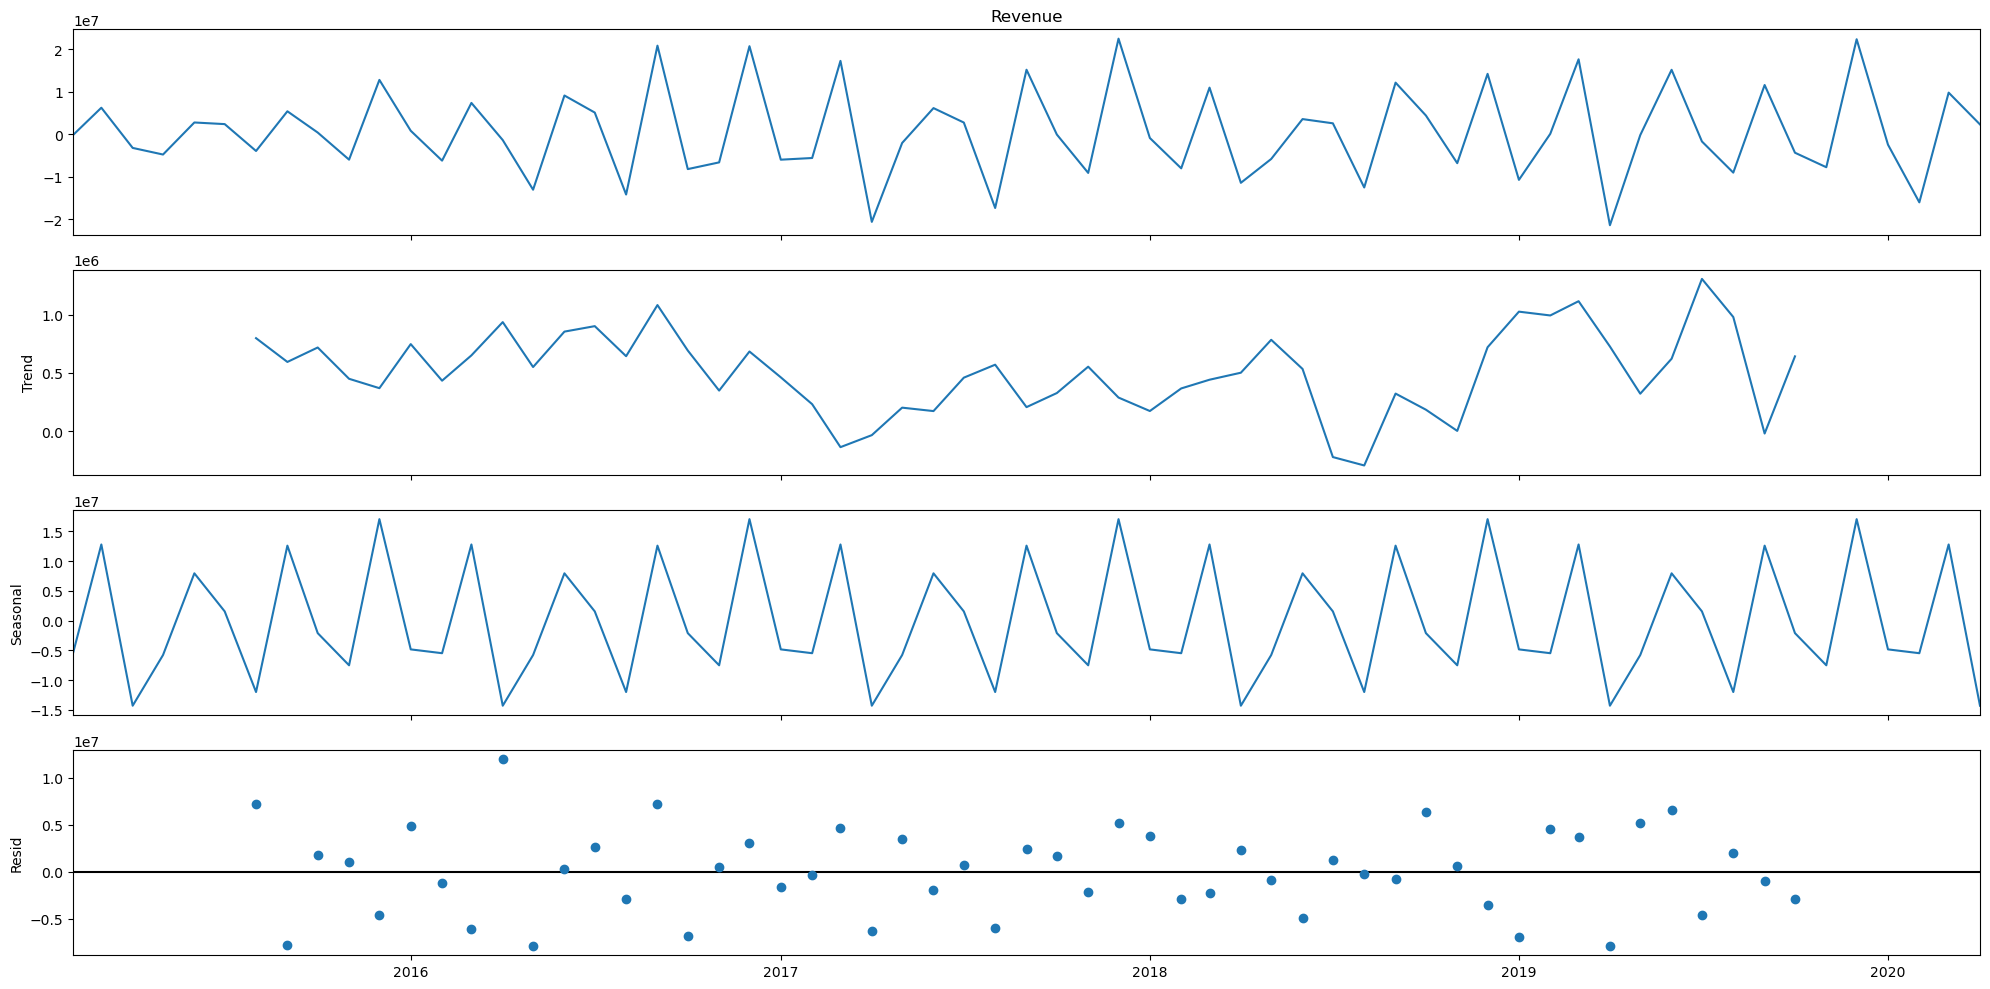

In [24]:
plt.rcParams.update({'figure.figsize': (20, 10)})

diff_series = df[target].diff().dropna()
decomposition = seasonal_decompose(diff_series, model='additive', period=12)
decomposition.plot()
plt.show()

In [25]:
adf_test_result = adfuller(diff_series)

In [26]:
adf_test_result

(-5.604330112829492,
 1.2441377995538942e-06,
 10,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 1739.0565654383058)

### Time series parameters

#### Autocorrelation

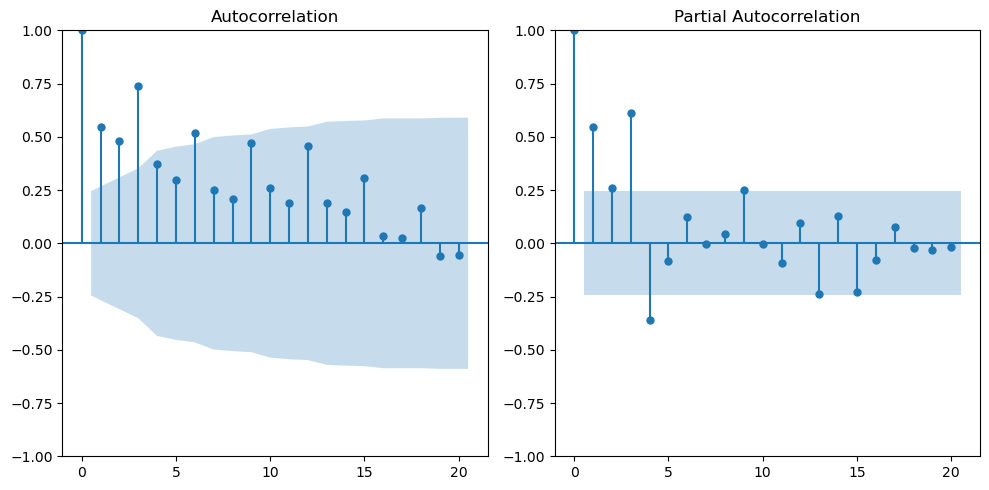

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_acf(df[target], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(df[target], lags=20, ax=plt.gca())
plt.tight_layout()
plt.show()

#### AIC

In [28]:
p = q = range(0, 4)
d = [1]
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_pdq = None
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model = ARIMA(df[target], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

In [29]:
best_pdq

(2, 1, 3)

### Feature selection

#### Granger test

In [30]:
raw_features = [x for x in df.columns if x != target]

In [31]:
max_lag = 5
granger_results = {}

for feature in raw_features:
    granger_result = grangercausalitytests(df[[target, feature]], maxlag=max_lag, verbose=False)
    granger_results[feature] = {lag: result[0]['ssr_ftest'] for lag, result in granger_result.items()}

In [32]:
for feature in raw_features:
    print(feature)
    print(pd.DataFrame(granger_results[feature], index=['F-statistic', 'p-values', 'degree-of-freedom', 'lag']))

Sales_quantity
                           1          2          3          4          5
F-statistic         0.202901   1.247342   2.730678   4.107349   3.466029
p-values            0.654013   0.294989   0.052722   0.005828   0.009380
degree-of-freedom  60.000000  57.000000  54.000000  51.000000  48.000000
lag                 1.000000   2.000000   3.000000   4.000000   5.000000
Average_cost
                           1         2          3          4          5
F-statistic         0.784890   1.20060   3.177506   6.009567   4.841875
p-values            0.379187   0.30851   0.031236   0.000485   0.001153
degree-of-freedom  60.000000  57.00000  54.000000  51.000000  48.000000
lag                 1.000000   2.00000   3.000000   4.000000   5.000000
The_average_annual_payroll_of_the_region
                           1          2          3          4          5
F-statistic         0.065902   0.302870   0.260151   0.400866   0.448940
p-values            0.798278   0.739876   0.853773   0.80711

#### Transform lag

In [33]:
df['Sales_quantity'] = df['Sales_quantity'].shift(4)
df['Average_cost'] = df['Average_cost'].shift(4)
df = df.drop(columns=['The_average_annual_payroll_of_the_region'])
df = df.dropna()

#### Multicollinearility

In [34]:
features = [x for x in df.columns if x != target]
X = df[features]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature       VIF
0  Sales_quantity  6.950432
1    Average_cost  6.950432


### Split dataset

In [35]:
train_ratio = 0.7
train_size = int(train_ratio * len(df))
split_date = df.index[train_size]

In [36]:
train_df = df[df.index <= split_date]
test_df = df[df.index > split_date]

In [37]:
train_df.tail()

,Revenue,Sales_quantity,Average_cost
2018-07-01,3.582653e+07,29004.0,1620.327900
2018-08-01,2.326866e+07,22033.0,1612.875581
2018-09-01,3.542349e+07,14959.0,1985.400039
2018-10-01,3.983157e+07,23067.0,1441.932865
2018-11-01,3.299915e+07,18397.0,1947.411801


In [38]:
test_df.head()

,Revenue,Sales_quantity,Average_cost
2018-12-01,4.722183e+07,12045.0,1931.810312
2019-01-01,3.645996e+07,23358.0,1516.546359
2019-02-01,3.654650e+07,22644.0,1759.033991
2019-03-01,5.419871e+07,19765.0,1669.574764
2019-04-01,3.274399e+07,33207.0,1422.044394


### Feature engineering

In [39]:
y_train = train_df[target]
X_train = train_df[features]
y_test = test_df[target]
X_test = test_df[features]

#### Standardization

In [40]:
scaler = StandardScaler()

In [41]:
train_index = X_train.index
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_train_scale.index = train_index

In [42]:
X_train_scale.head()

,Sales_quantity,Average_cost
2015-05-01,-0.774255,-1.336531
2015-06-01,-0.987256,-0.997721
2015-07-01,-0.152009,-0.909641
2015-08-01,-0.287449,-1.411047
2015-09-01,-1.575008,-0.096025


In [43]:
test_index = X_test.index
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=features)
X_test_scale.index = test_index

## Model

In [44]:
model = ARIMA(y_train, exog=X_train, order=best_pdq)
model_fit = model.fit()

In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   43
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -718.818
Date:                Fri, 04 Oct 2024   AIC                           1453.636
Time:                        15:08:34   BIC                           1467.538
Sample:                    05-01-2015   HQIC                          1458.732
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Sales_quantity  -684.7367    310.298     -2.207      0.027   -1292.910     -76.564
Average_cost   -6585.7004   3760.029     -1.752      0.080    -1.4e+04     783.821
ar.L1             -0.8957      0.053    -17.018      0.000      -0.999      -0.793
ar.L2             -0.9705      0.038    -25.466      0.000      -1.045      -0.896
ma.L1              0.5560      0.190      2.927      0.003       0.184       0.928
ma.L2              0.8276      0.323      2.561      0.010       0.194       1.461
ma.L3             -0.2216      0.151     -1.465      0.143      -0.518       0.075
sigma2          3.534e+13      6e-11   5.89e+23      0.000    3.53e+13    3.53e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.98   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.16   Prob(JB):                         0.68
Heteroskedasticity (H):               0.28   Skew:                            -0.29
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+43. Standard errors may be unstable.
"""

## Evaluate

### Long step

In [46]:
y_pred = model_fit.forecast(len(y_test), exog=X_test)

In [47]:
mean_squared_error(y_pred, y_test)

159758246232116.3

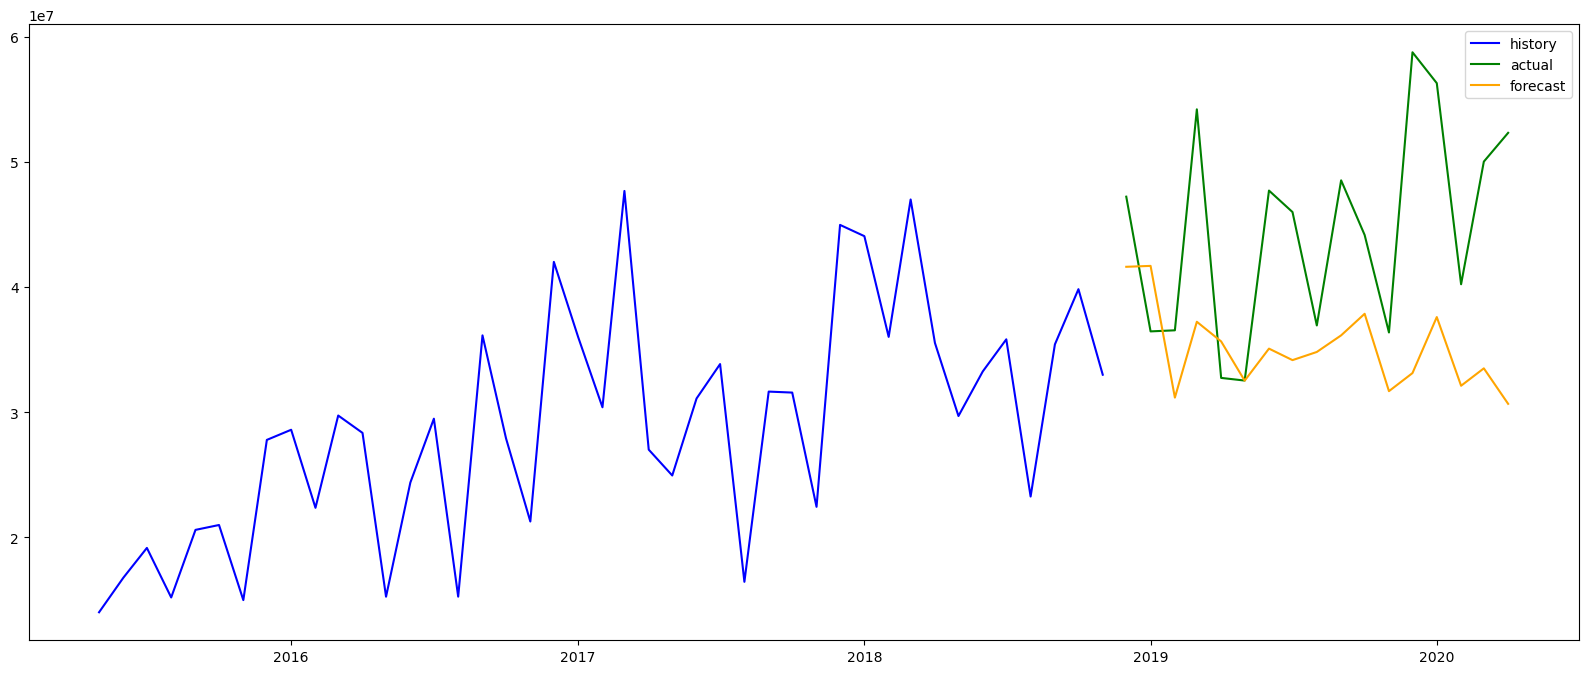

In [48]:
plt.figure(figsize=(20, 8))
plt.plot(y_train.index, y_train, c='blue', label='history')
plt.plot(y_test.index, y_test, c='green', label='actual')
plt.plot(y_test.index, y_pred, c='orange', label='forecast')
plt.legend()
plt.show()